In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data

relationship_df = pd.read_csv('countries_relationship.csv', index_col = 0)

In [5]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,26
2,Bulgaria,Germany,6
3,Bulgaria,Russia,5
4,Germany,Italy,23
...,...,...,...
74,Greece,Italy,3
75,Italy,Japan,6
76,Romania,Russia,6
77,India,Lebanon,1


In [7]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## Graph Visualization - Networkx

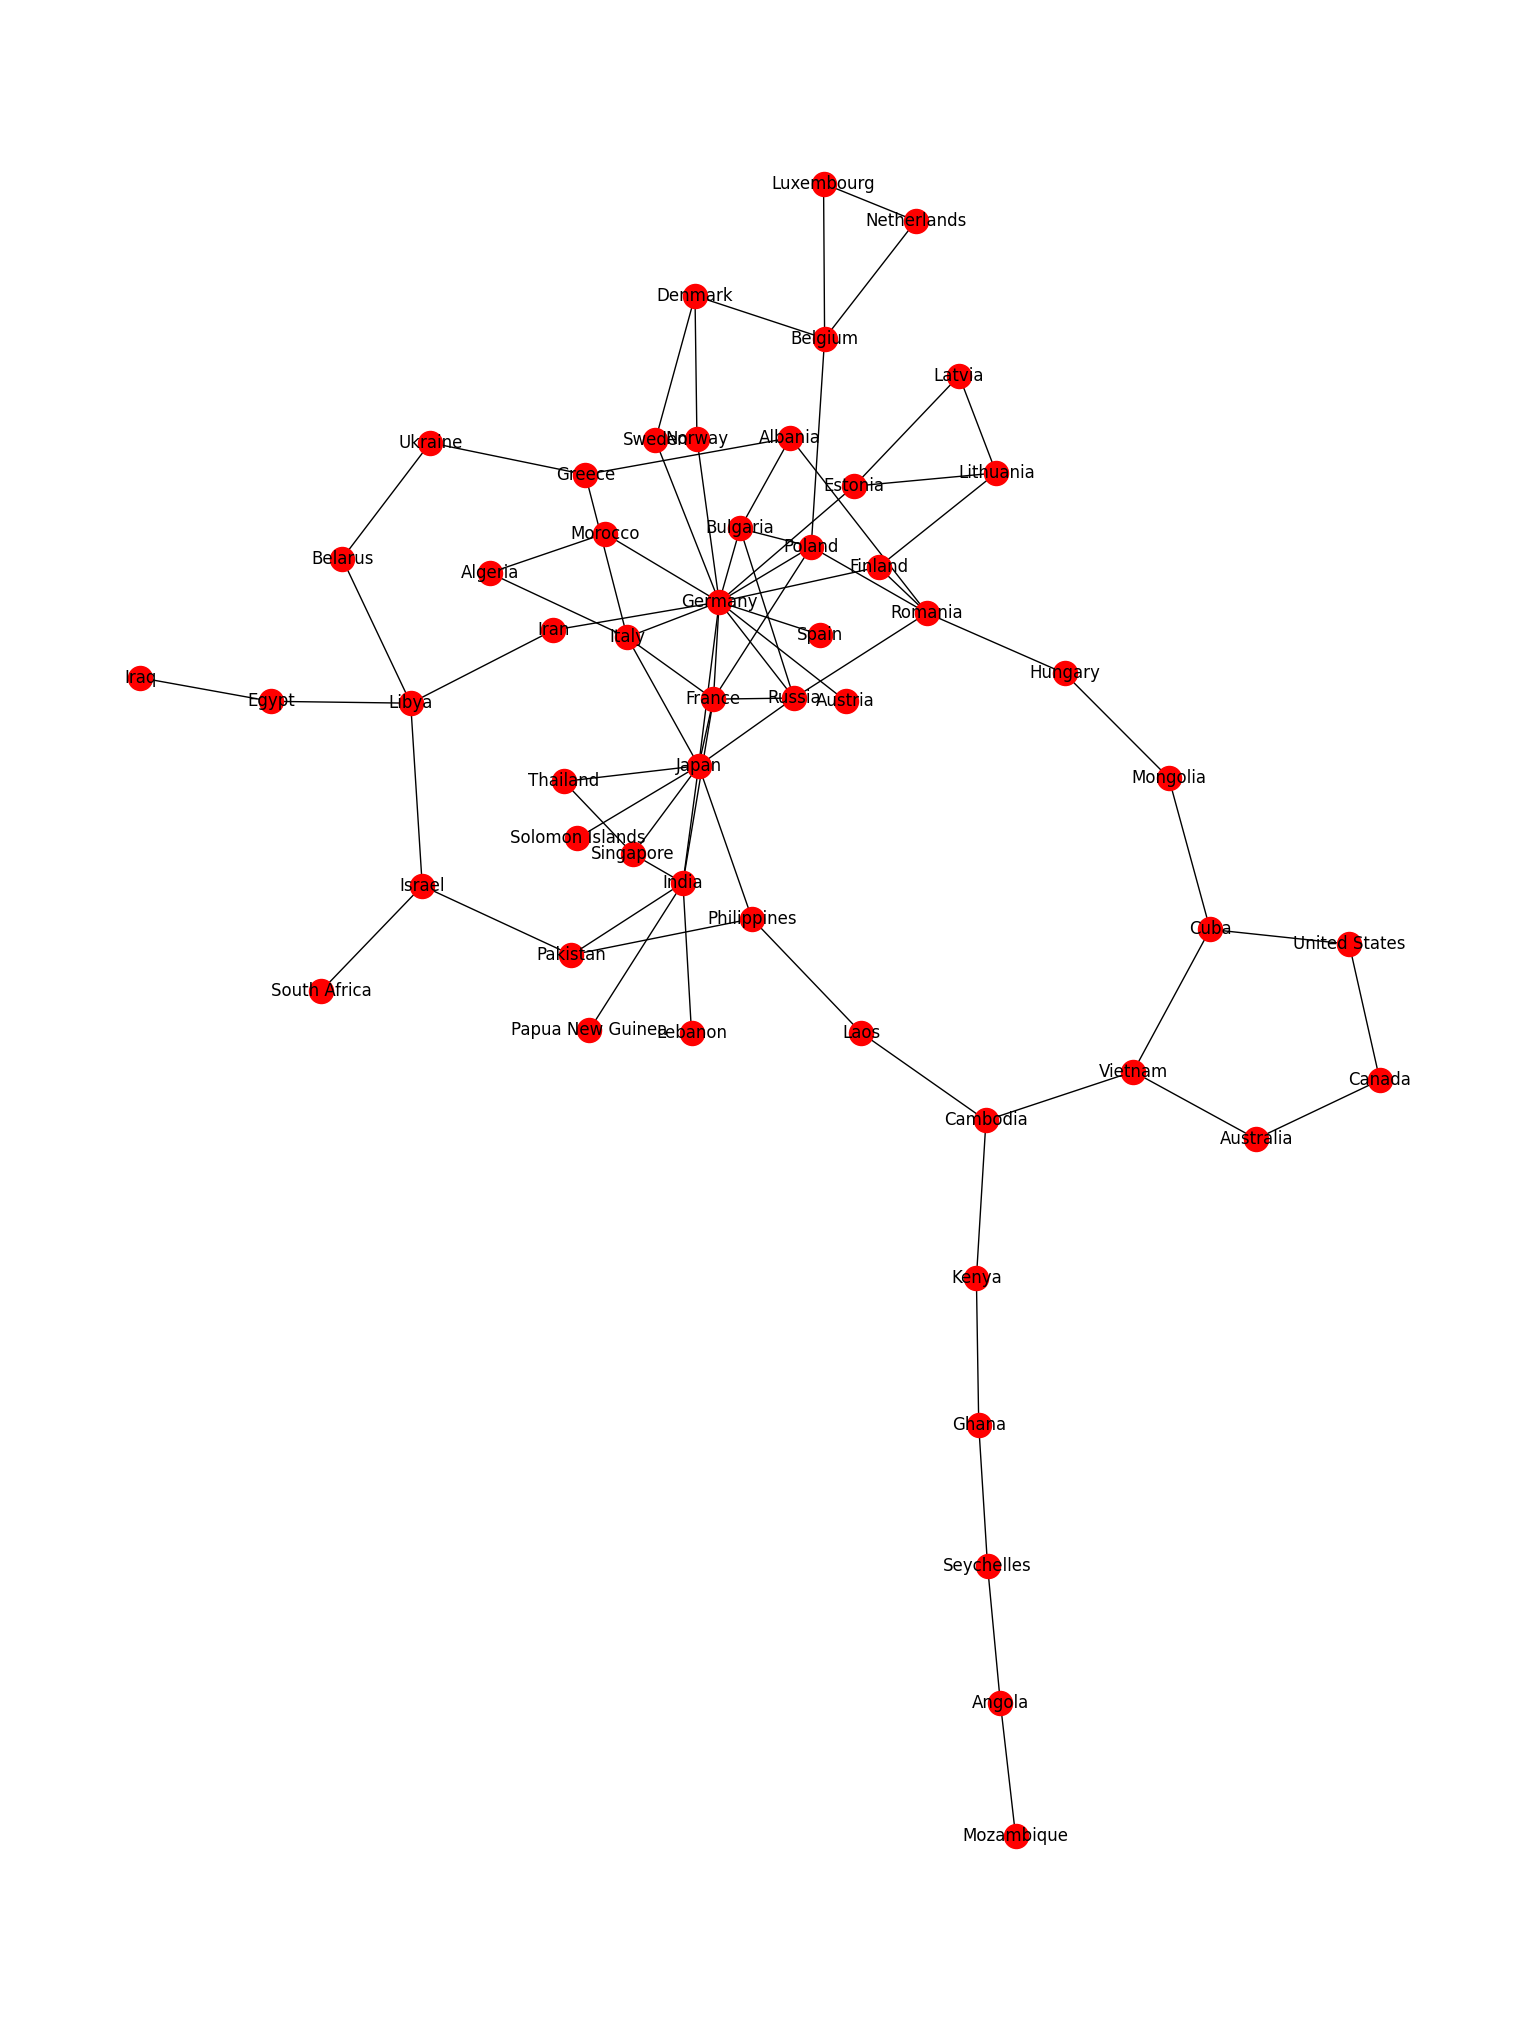

In [9]:
h = plt.figure(figsize = (15,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [11]:
h.savefig('networkx_plt_countries.png')

## Pyvis

In [13]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Community Detection: Leiden Algorithm

In [15]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [17]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [19]:
new_com = coms.to_node_community_map()

In [21]:
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Bulgaria': [0],
             'Italy': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Albania': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Romania': [0],
             'Philippines': [1],
             'Pakistan': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Seychelles': [1],
             'Angola': [1],
             'Mozambique': [1],
             'Greece': [2],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
             'Egypt': [2],
             'Iraq': [2],
             'Israel': [2],
             'South Africa': [2],
             'Iran': [2],
             'Japan': [3],
             'Thailand': [3],
             'Singapore': [3],
    

In [23]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [25]:
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Italy': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Albania': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Romania': 0,
 'Philippines': 1,
 'Pakistan': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Kenya': 1,
 'Ghana': 1,
 'Seychelles': 1,
 'Angola': 1,
 'Mozambique': 1,
 'Greece': 2,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'Japan': 3,
 'Thailand': 3,
 'Singapore': 3,
 'Solomon Islands': 3,
 'India': 3,
 'Papua New Guinea': 3,
 'Lebanon': 3,
 'Hungary': 4,
 'Mongolia': 4,
 'Cuba': 4,
 'United States': 4,
 'Canada': 4,
 'Australia': 4,
 'Vietnam': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5,
 'Estonia': 6,
 'Latvia': 6,
 'Lithuania': 6}

In [27]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Insights from Leiden Algorithm
##### The Leiden algorithm split the listed countries into six communities, indicated by the six different colors of the edges. The communities seem to largely be based off of geographical locations of each country: for example, the pink community consists of Scandinavia and Benelux; the blue community contains most of the "key players" in Europe associated with the two world wars (such as Germany, France, Russia, and Italy). The red, orange and purple groups contain mostly non-European countries, though there are some curious findings in these communities: for example, in the red group, why is Mongolia grouped with Cuba, Canada, Australia and the USA? In the organge group, Cambodia seems to act as a link between Asian and African countries.

##### With this network graph, it is easy to see which specific countries acted as "bridges" or "links" between different communities. For example, the United States and Russia act as bridges between the "red" and "blue" neighborhoods. Additionally, the thickness of the edges displays which countries played particularly imporant roles. In this case, Germany has five of the visibly thickest edges to Italy, Poland, Russia, France and Japan (which makes sense given the context of the two world wars). Other thick edges can be seen in other communities: India to Japan and Pakistan (orange); and Libya and Egypt (purple).

## Most Important Countries
### Degree Centrality

In [34]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.11320754716981132,
 'Russia': 0.09433962264150943,
 'Germany': 0.2641509433962264,
 'Bulgaria': 0.07547169811320754,
 'Italy': 0.09433962264150943,
 'Austria': 0.018867924528301886,
 'Spain': 0.018867924528301886,
 'Poland': 0.09433962264150943,
 'Estonia': 0.05660377358490566,
 'Latvia': 0.03773584905660377,
 'Lithuania': 0.05660377358490566,
 'Finland': 0.05660377358490566,
 'Belgium': 0.07547169811320754,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Denmark': 0.05660377358490566,
 'Norway': 0.03773584905660377,
 'Sweden': 0.03773584905660377,
 'Albania': 0.05660377358490566,
 'Greece': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.018867924528301886,
 'Japan': 0.16981132075471697,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'Thailand': 0.03773584905660377,
 'Singapore': 0.05660377358490566,
 'Philippines':

In [36]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

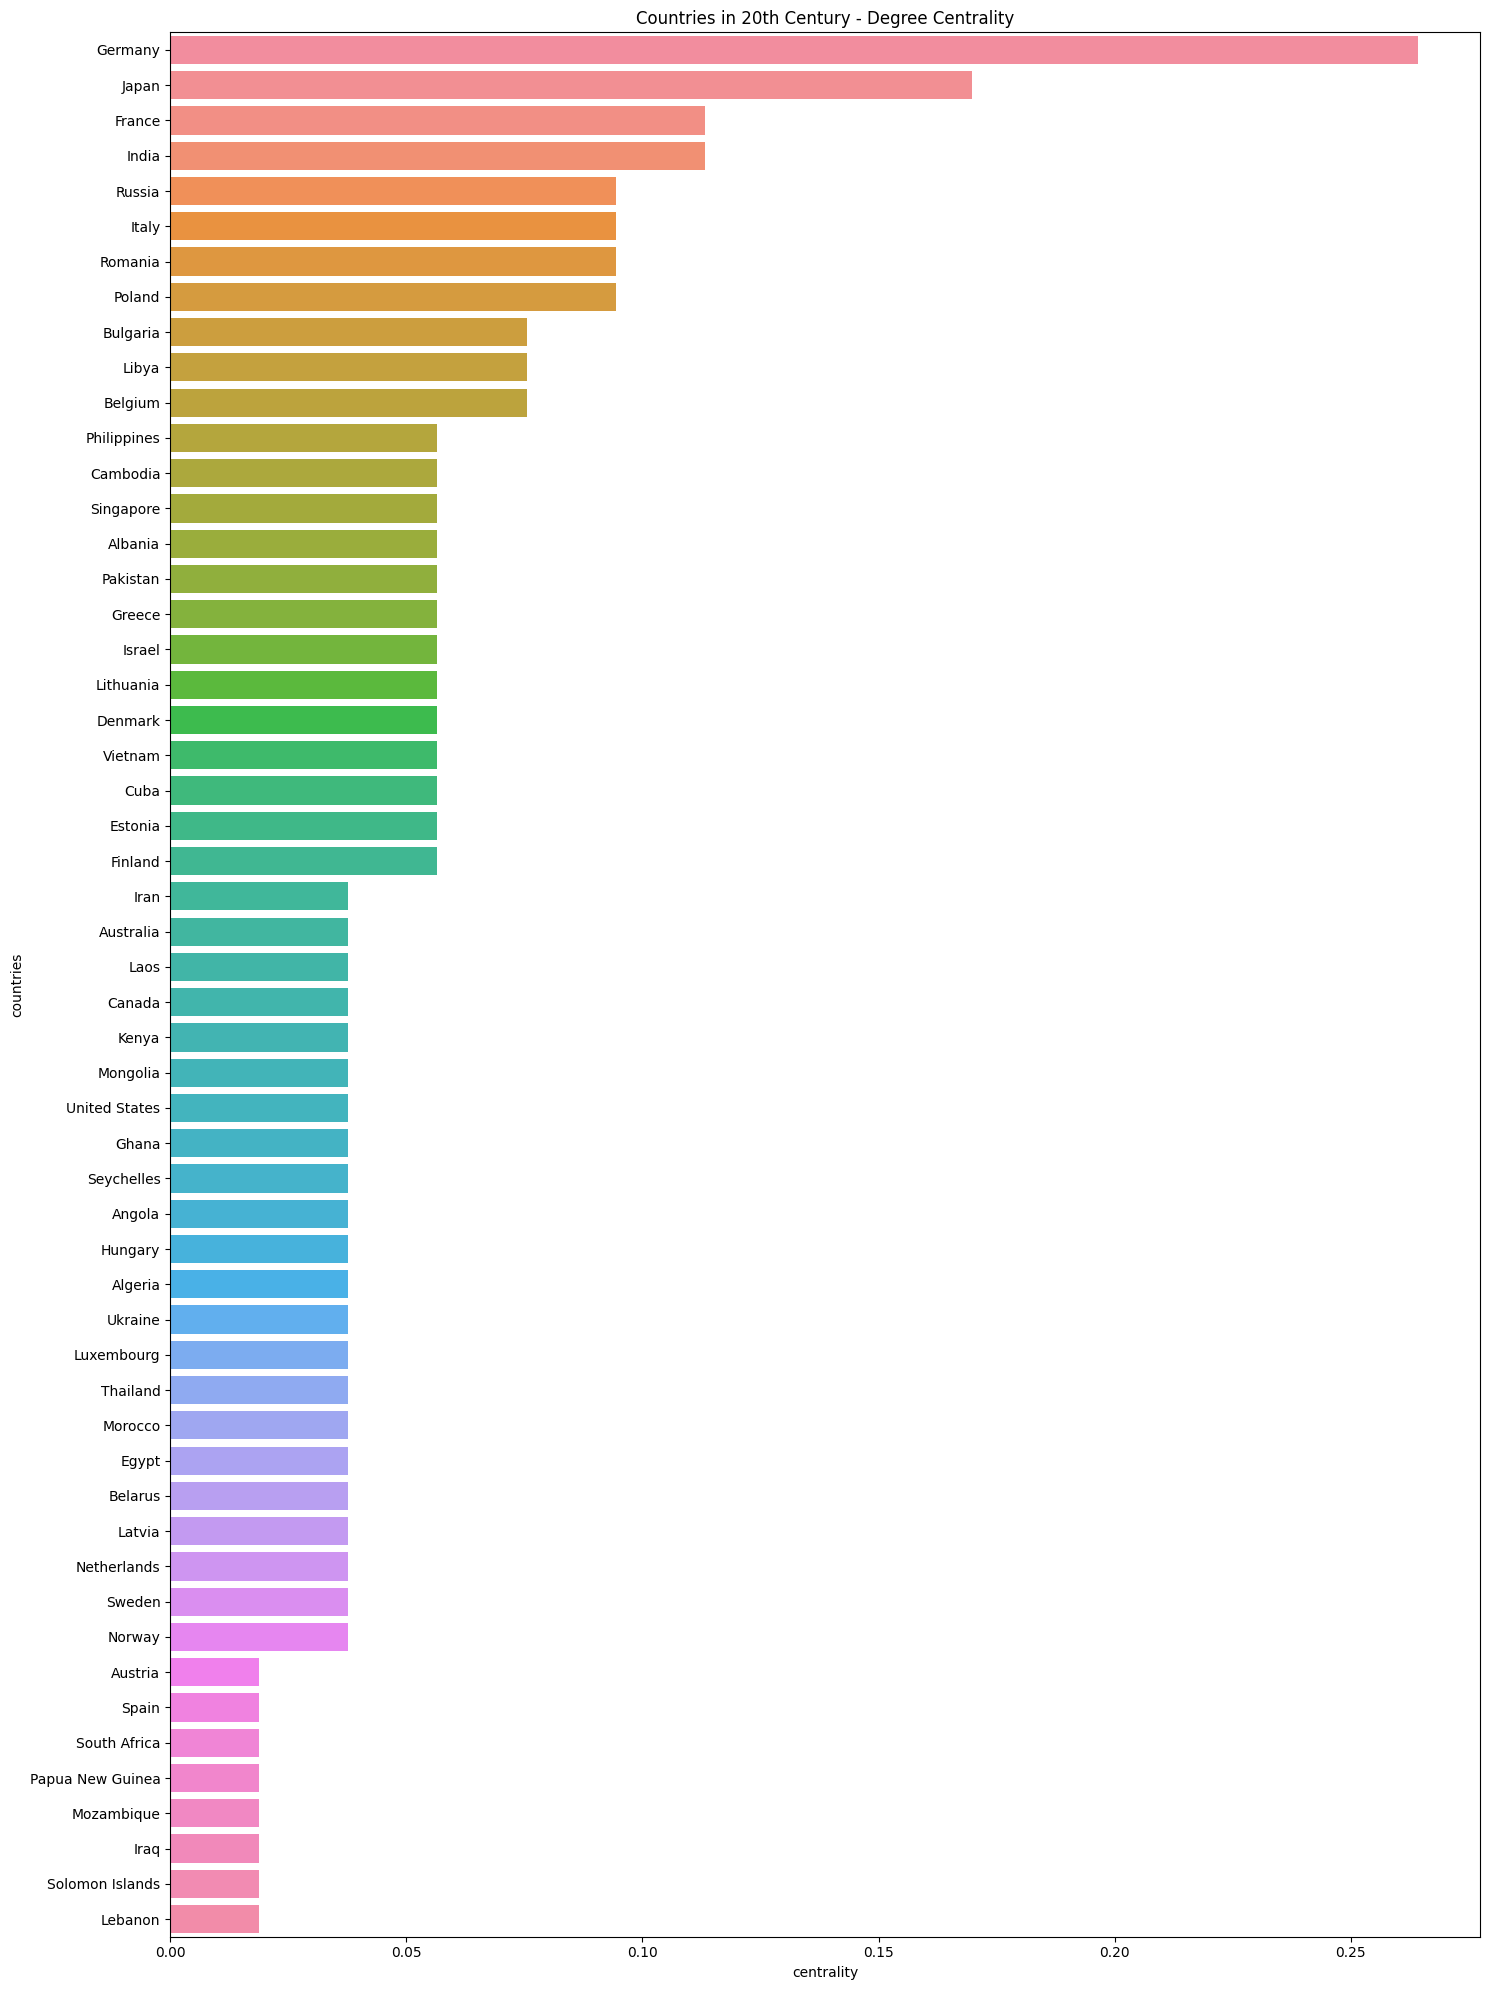

In [38]:
# Sort the dataframe by 'centrality' in descending order
degree_df_sorted = degree_df.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(15, 20))  # Larger figure size
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="countries", saturation=0.9, data=degree_df_sorted)
plt.title("Countries in 20th Century - Degree Centrality")
plt.tight_layout()
plt.show()

### Insights
##### Germany ranks first in all three degrees of centrality. With regards to degree centrality, this means that Germany has the highest number of connections (edges) to other countries (nodes). Japan, Russia, France, India and Italy also have high degrees of centrality. India's connections are mostly in the orange community, whereas Japan has connections to both the orange and blue communities.

## Closeness Centrality

In [43]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [45]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

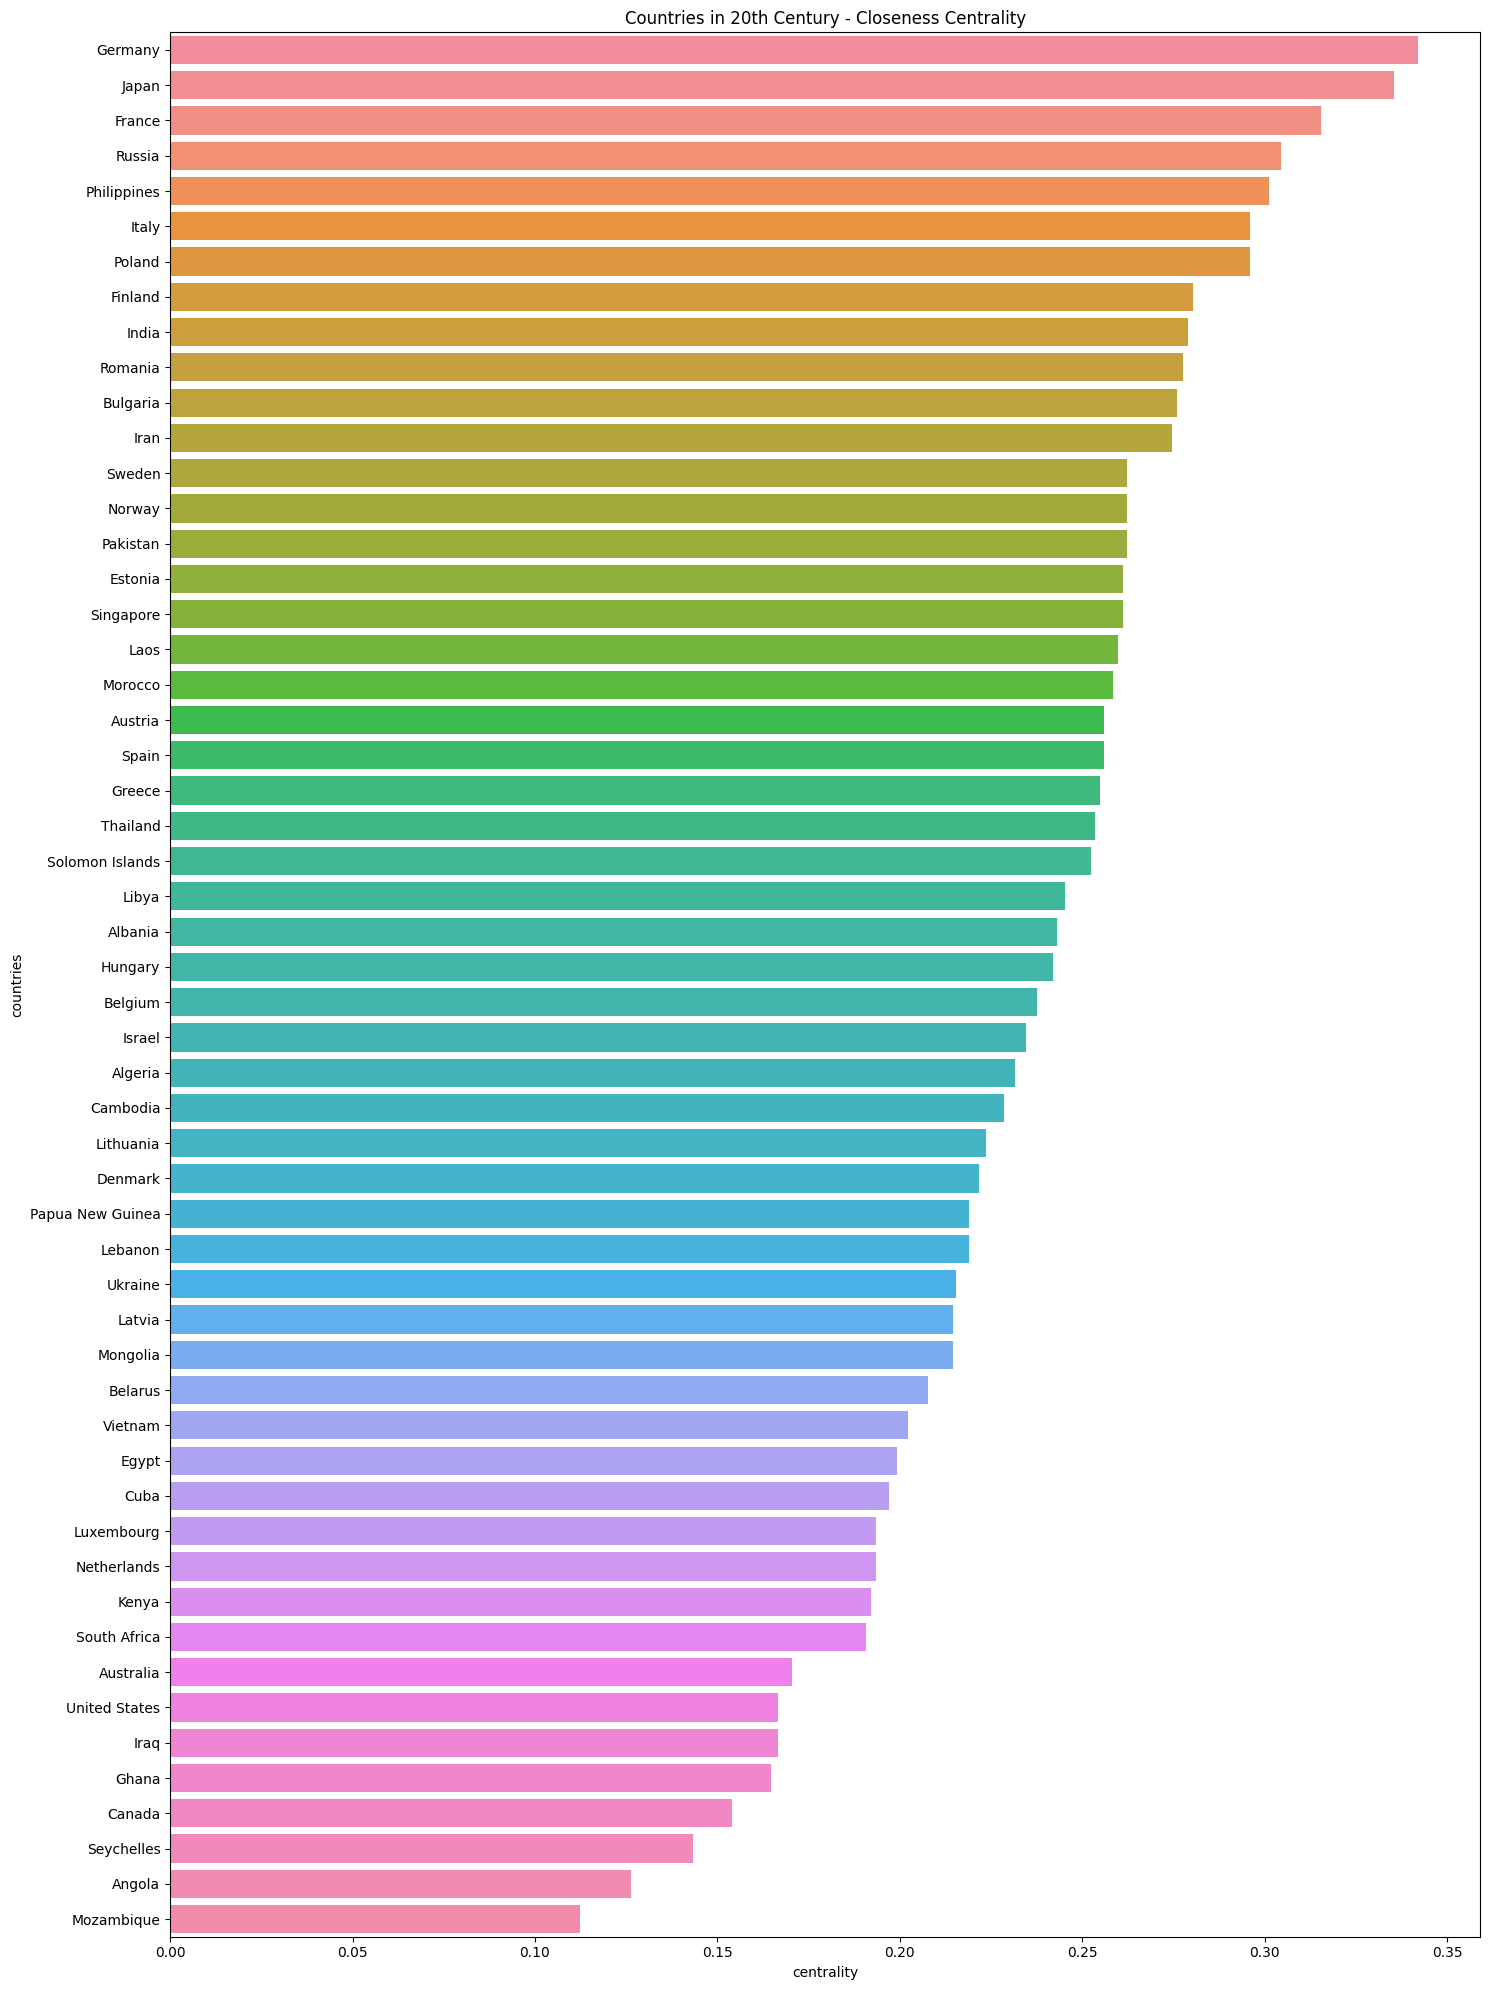

In [47]:
# Sort the dataframe by 'centrality' in descending order
closeness_df_sorted = closeness_df.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(15, 20))  # Increase figure size for readability
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="countries", saturation=0.9, data=closeness_df_sorted)
plt.title("Countries in 20th Century - Closeness Centrality")
plt.tight_layout()
plt.show()

### Insights
##### Germany ranks the top of the list again, though in this case, its closeness centrality measure is higher (closer to 0.4) than the degree centrality (which was closer to 0.25). This indicates that Germany is in close proximity to other countries, displayed by the thickness of its edges to other nodes. This makes sense as Germany was arguably the most active or powerful country in both World Wars.

##### Japan, Russia, France and Italy once again rank higher here as well. India ranks lower than the aforementioned countries in terms of closeness indicating that while it has a similar number of connections, India's ability to communicate or control information through their networks is not as strong as Japan and the aforementioned European countries.

## Betweenness Centrality

In [51]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [53]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

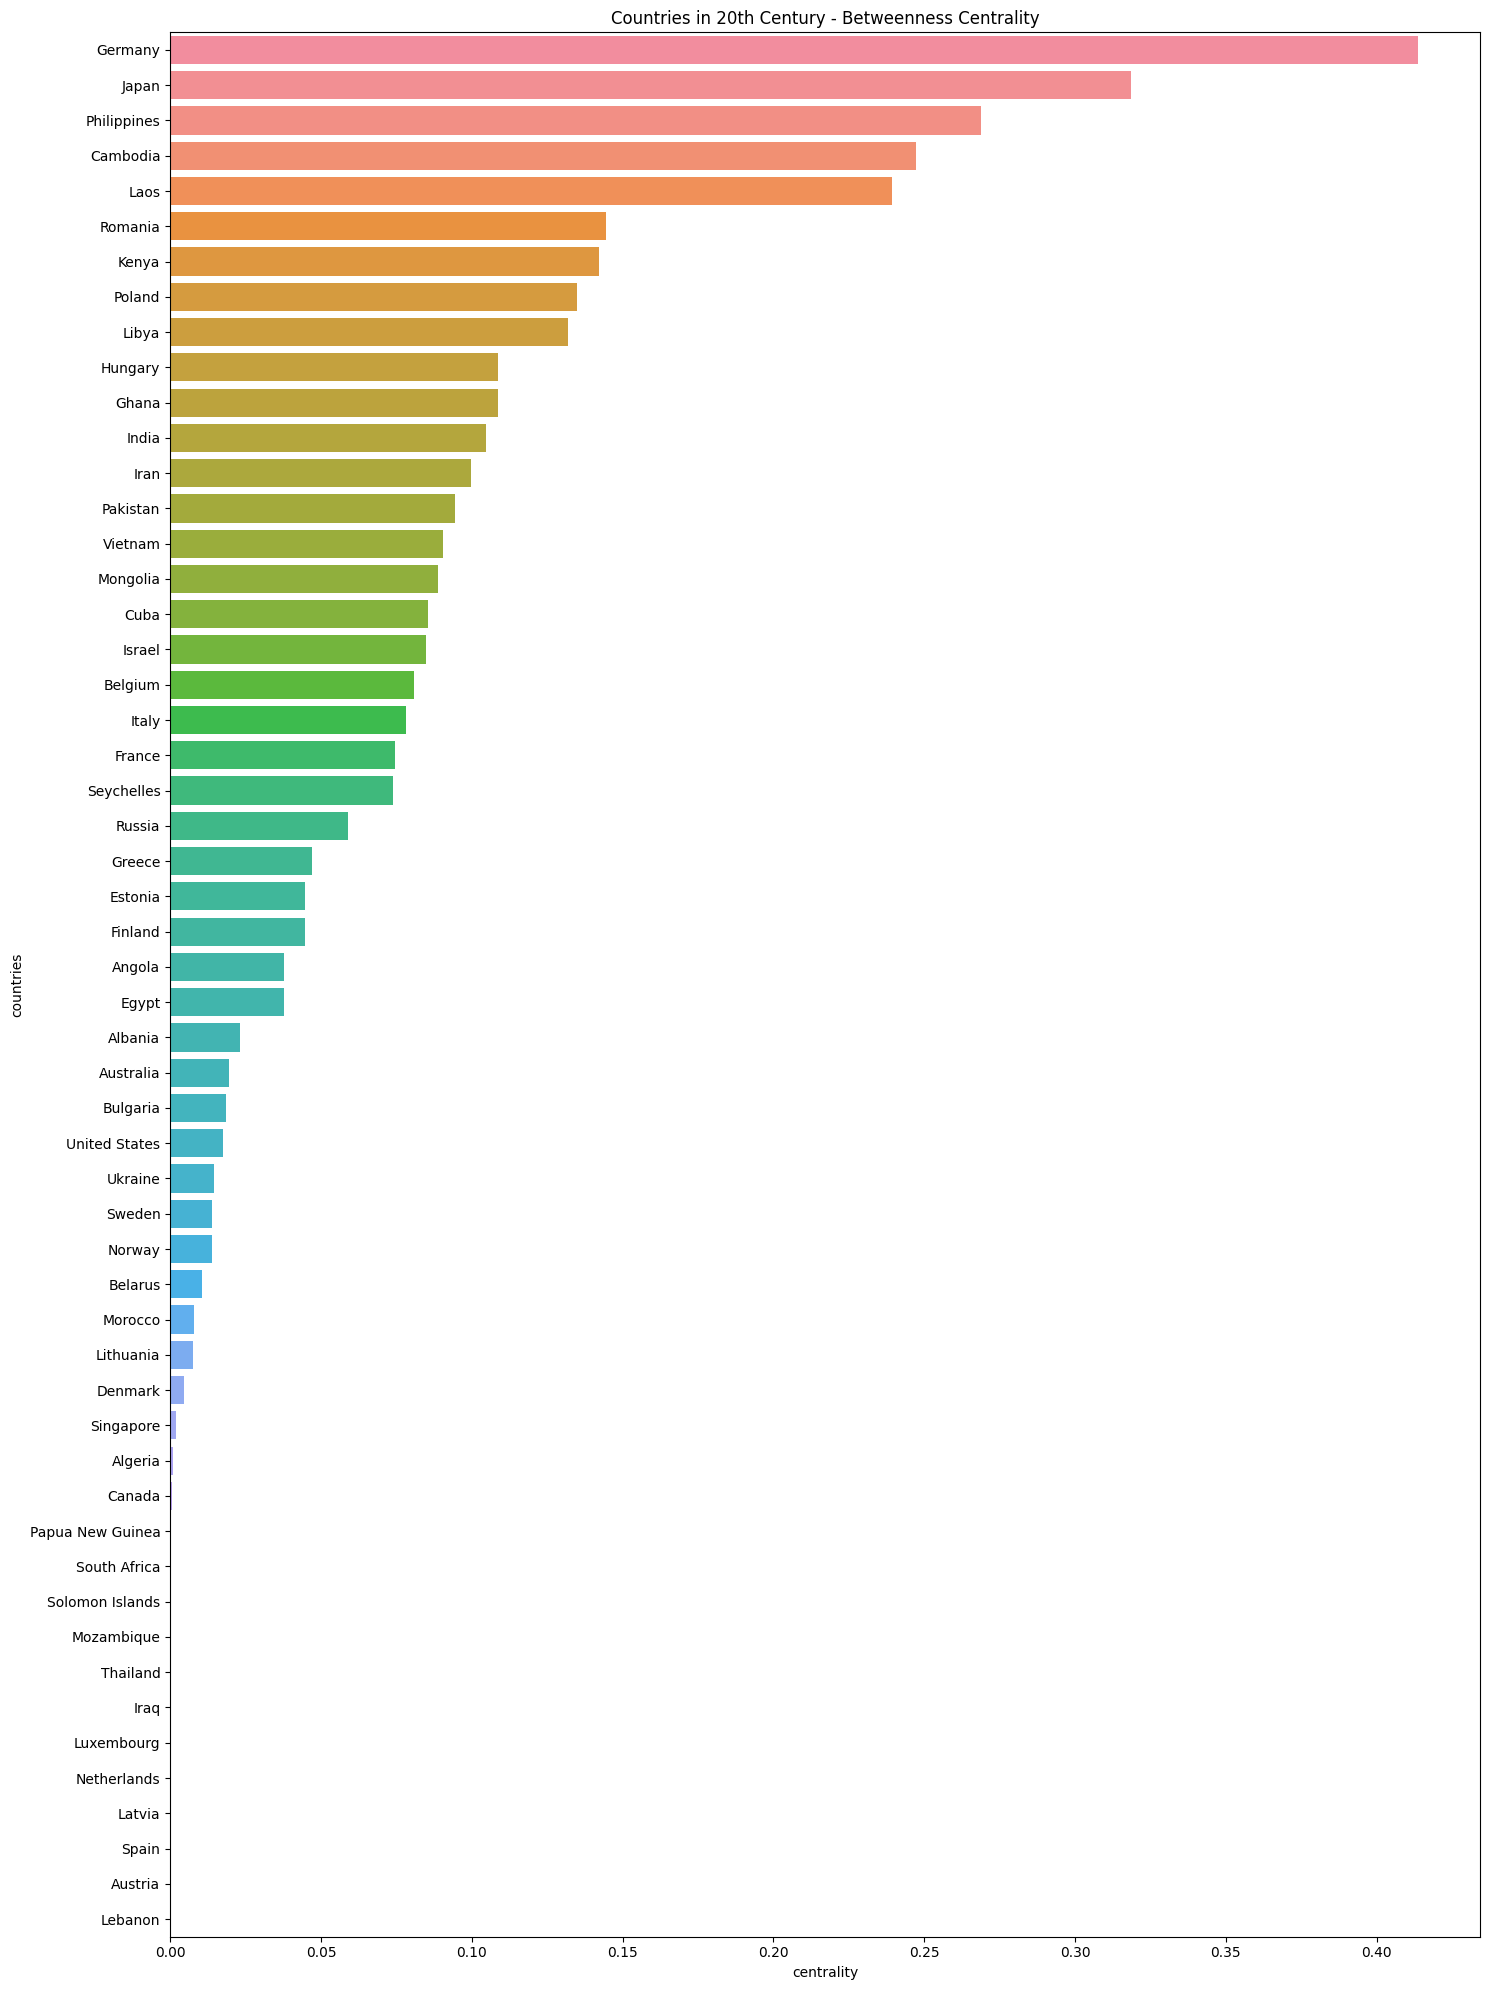

In [55]:
betweennes_df_sorted = betweennes_df.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(15, 20))  # Increase figure size for better readability
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="countries", saturation=0.9, data=betweennes_df_sorted)
plt.title("Countries in 20th Century - Betweenness Centrality")
plt.tight_layout()
plt.show()

### Insights
##### The ranking in this Betweenness Centrality graph is a bit different compared to the other two. Germany again ranks at the top, indicating that the paths and connections they have make it easy for them to connect with other countries outside of their communities, funcitoning as a bridge. The next most efficient "bridge" countries on the list include Japan, Russia, the Philippines and Cambodia - the latter two did not rank as highly on the other two graphs.

In [58]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')